In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Retrieving the transaction dataset:

In [5]:
dataset = pd.read_excel("C:/Users/Manav Singh/Downloads/QVI_transaction_data.xlsx")

In [6]:
dataset.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


# REMOVAL OF OUTLIERS:

In [4]:
#The above output indicates presence of outliers in prod_quantity as a result of which we have them in tot_sales too
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
#Date shouldnt be int and also loyalty ,store , product numbers should be categorical values
#dataset['DATE'] = pd.to_datetime(dataset['DATE'], format='%Y%m%d')
dataset['DATE'] = pd.to_datetime(dataset['DATE'], origin='1899-12-30', unit='D')
dataset['LYLTY_CARD_NBR'] = pd.Categorical(dataset['LYLTY_CARD_NBR'])
dataset['STORE_NBR'] = pd.Categorical(dataset['STORE_NBR'])
dataset['PROD_NBR'] = pd.Categorical(dataset['PROD_NBR'])


In [10]:
dataset.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

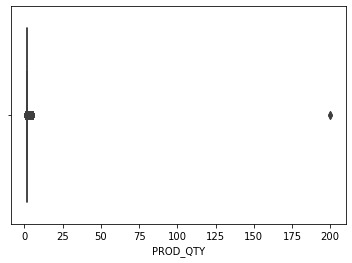

In [18]:
sns.boxplot(dataset.PROD_QTY)

In [21]:
dataset.describe()

,TXN_ID,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.000000
mean,1.351583e+05,1.907309,7.304200
std,7.813303e+04,0.643654,3.083226
min,1.000000e+00,1.000000,1.500000
25%,6.760150e+04,2.000000,5.400000
50%,1.351375e+05,2.000000,7.400000
75%,2.027012e+05,2.000000,9.200000
max,2.415841e+06,200.000000,650.000000


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.05)

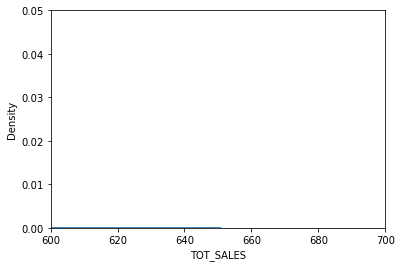

In [17]:
sns.distplot(dataset.TOT_SALES,kde=True)
plt.xlim(600, 700)
plt.ylim(0,0.050)


In [24]:
count = (dataset['PROD_QTY'] == 200).sum()
count
#so there are two insances of this outlier which we should remove

2

In [16]:
dataset = dataset[dataset['PROD_QTY'] != 200]


In [81]:
dataset.describe() #DONE

,TXN_ID,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,1.351576e+05,1.905813,7.299346,182.425512
std,7.813292e+04,0.343436,2.527241,64.325148
min,1.000000e+00,1.000000,1.500000,70.000000
25%,6.760050e+04,2.000000,5.400000,150.000000
50%,1.351365e+05,2.000000,7.400000,170.000000
75%,2.026998e+05,2.000000,9.200000,175.000000
max,2.415841e+06,5.000000,29.500000,380.000000


# Creating new columns

In [8]:
import re
dataset['PACK_SIZE'] = 0

for i, x in enumerate(dataset['PROD_NAME']):
    numbers = re.findall(r'\d+', x)
    if numbers:
        dataset.loc[i, 'new'] = int(numbers[0])

In [11]:
dataset.drop('PACK_SIZE', axis=1, inplace=True)

In [13]:
dataset.rename(columns={'new': 'PACK_SIZE'}, inplace=True)


In [17]:
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


In [18]:
dataset.describe()

,TXN_ID,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,1.351576e+05,1.905813,7.299346,182.425512
std,7.813292e+04,0.343436,2.527241,64.325148
min,1.000000e+00,1.000000,1.500000,70.000000
25%,6.760050e+04,2.000000,5.400000,150.000000
50%,1.351365e+05,2.000000,7.400000,170.000000
75%,2.026998e+05,2.000000,9.200000,175.000000
max,2.415841e+06,5.000000,29.500000,380.000000


In [20]:
#ADDING BRANDS COULMN
dataset['BRAND'] = dataset['PROD_NAME'].str.split().str[0]

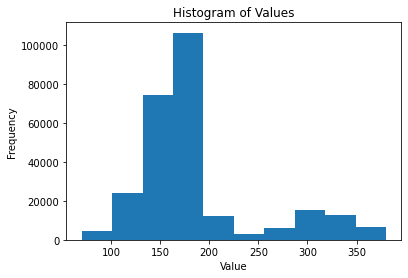

In [83]:
plt.hist(dataset['PACK_SIZE'],bins=10)  # 'Value' is the column you want to create a histogram for
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

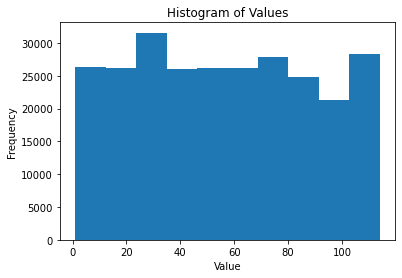

In [84]:
plt.hist(dataset['PROD_NBR'],bins=10)  # 'Value' is the column you want to create a histogram for
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

In [54]:
count = (dataset['BRAND']).nunique()
count

29

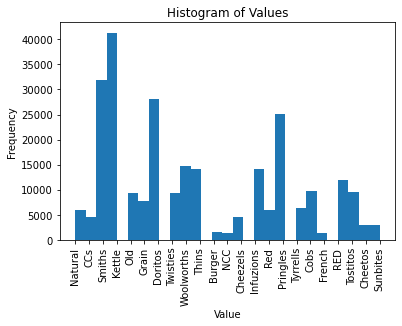

In [85]:
plt.hist(dataset['BRAND'],bins=29) # 'Value' is the column you want to create a histogram for
plt.xticks(rotation='vertical')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

# Removing errors in Brand naming

In [21]:
#Typos exist in the naming of the brands so they should be  removeed:
# snbts and sunbites , rrd and red, infzns and Infuzions, Smiths and Smith, ww and woolworth,doritos nad dorito, grain and grnwes
dataset['BRAND'] = dataset['BRAND'].replace('RRD', 'RED')
dataset['BRAND'] = dataset['BRAND'].replace('Infzns', 'Infuzions')
dataset['BRAND'] = dataset['BRAND'].replace('Snbts', 'Sunbites')
dataset['BRAND'] = dataset['BRAND'].replace('Smith', 'Smiths')
dataset['BRAND'] = dataset['BRAND'].replace('WW', 'Woolworths')
dataset['BRAND'] = dataset['BRAND'].replace('Dorito', 'Doritos')
dataset['BRAND'] = dataset['BRAND'].replace('GrnWves', 'Grain')

In [22]:
count = (dataset['BRAND']).nunique()
count

23

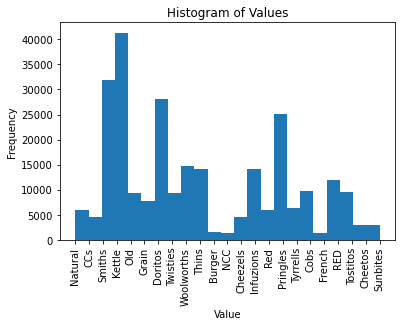

In [86]:
plt.hist(dataset['BRAND'],bins=23) # 'Value' is the column you want to create a histogram for
plt.xticks(rotation='vertical')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

# Retrieving of customer dataset:

In [23]:
dataset2 = pd.read_csv("C:/Users/Manav Singh/Downloads/QVI_purchase_behaviour.csv")

In [24]:
dataset2.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [63]:
dataset2.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [75]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   LYLTY_CARD_NBR    72637 non-null  category
 1   LIFESTAGE         72637 non-null  category
 2   PREMIUM_CUSTOMER  72637 non-null  category
dtypes: category(3)
memory usage: 3.0 MB


In [25]:
dataset2['PREMIUM_CUSTOMER'] = pd.Categorical(dataset2['PREMIUM_CUSTOMER'])
dataset2['LIFESTAGE'] = pd.Categorical(dataset2['LIFESTAGE'])
dataset2['LYLTY_CARD_NBR'] = pd.Categorical(dataset2['LYLTY_CARD_NBR'])



# Merging of two datasets: 

In [26]:
#Merging the two datasets:
merged_data = pd.merge(dataset, dataset2, on='LYLTY_CARD_NBR')

In [88]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [78]:
count = (dataset['PROD_QTY'] == 200).sum()
count

2

In [90]:
merged_data.describe()

,TXN_ID,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,1.351576e+05,1.905813,7.299346,182.425512
std,7.813292e+04,0.343436,2.527241,64.325148
min,1.000000e+00,1.000000,1.500000,70.000000
25%,6.760050e+04,2.000000,5.400000,150.000000
50%,1.351365e+05,2.000000,7.400000,170.000000
75%,2.026998e+05,2.000000,9.200000,175.000000
max,2.415841e+06,5.000000,29.500000,380.000000


In [91]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  category      
 2   LYLTY_CARD_NBR    264834 non-null  category      
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  category      
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  category      
 11  PREMIUM_CUSTOMER  264834 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 21.0+ MB


In [92]:
#NO NULLS PRESENT

# ANALYSIS:

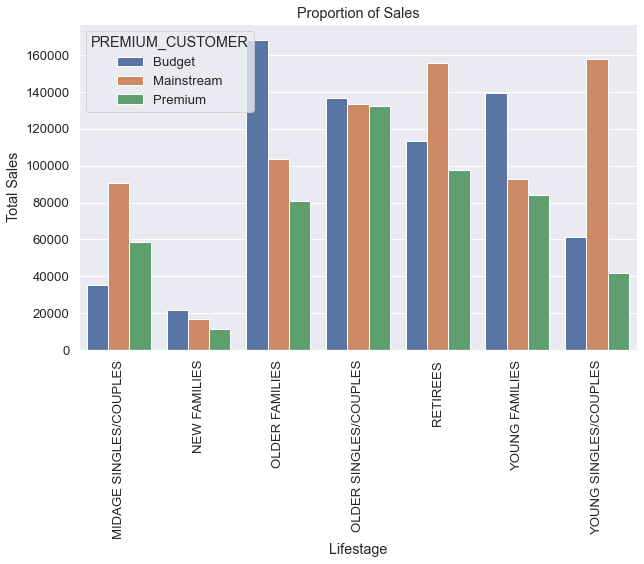

In [93]:
sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.barplot(data=sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

# Set plot labels and title
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Proportion of Sales')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Majority of sales come from mainstream-young singles/couples , mainstream-retiress,budget older families, budget younger families

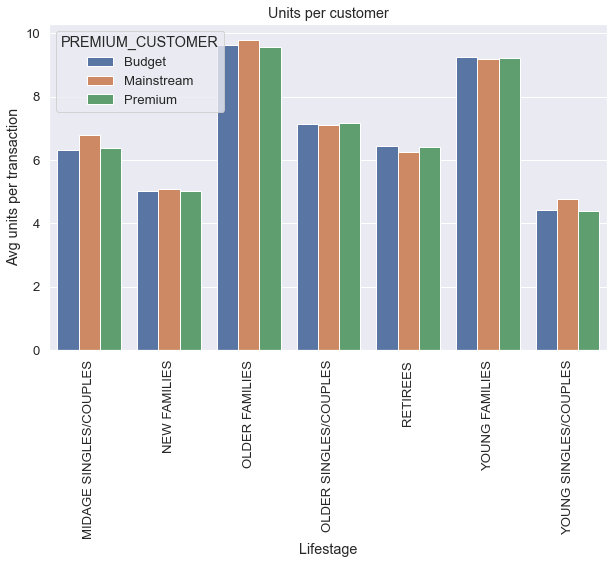

In [95]:
# Calculate average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
av = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()).reset_index()
av.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG']


plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.barplot(data=av, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER')


plt.xlabel('Lifestage')
plt.ylabel('Avg units per transaction')
plt.title('Units per customer')


plt.xticks(rotation=90)

# Show the plot
plt.show()

### Older and young familes buy the most per transaction , makes sense 

In [96]:
avg = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).reset_index()
avg.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG']

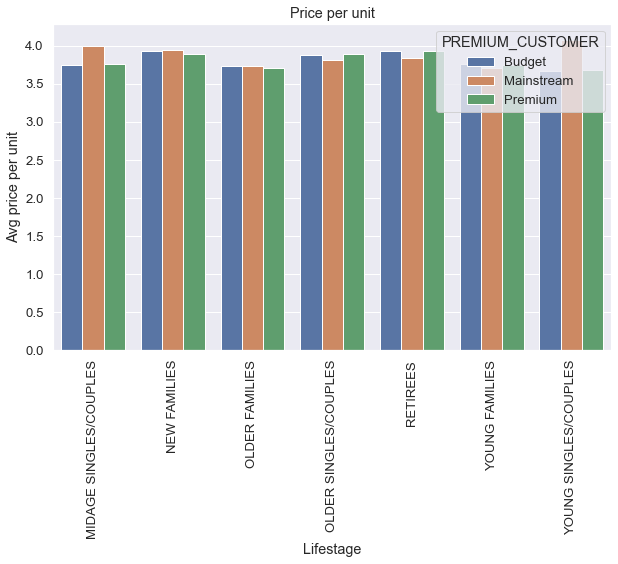

In [98]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.barplot(data=avg, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER')


plt.xlabel('Lifestage')
plt.ylabel('Avg price per unit')
plt.title('Price per unit')


plt.xticks(rotation=90)


plt.show()

In [99]:
avrg = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: (x['PACK_SIZE']*x['PROD_QTY']).sum() / x['PROD_QTY'].sum()).reset_index()
avrg.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG']

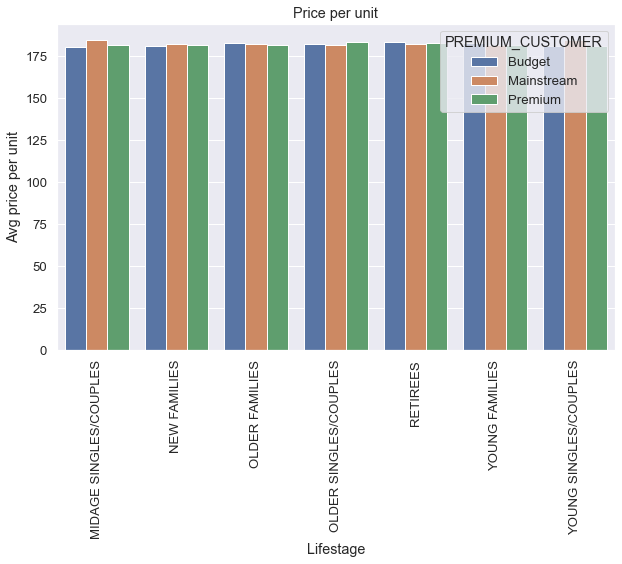

In [100]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.barplot(data=avrg, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER')


plt.xlabel('Lifestage')
plt.ylabel('Avg price per unit')
plt.title('Price per unit')


plt.xticks(rotation=90)


plt.show()

#### BRAND AFFINITY AS PER LIFESTAGES THAT DRIVE SALES THE MOST:

In [27]:
filtered_data = merged_data[merged_data['LIFESTAGE'].isin(['OLDER FAMILIES', 'RETIREES', 'YOUNG SINGLES/COUPLES'])]


avrge = filtered_data.groupby(['LIFESTAGE', 'BRAND'])['TOT_SALES'].sum().reset_index()

table = avrge.pivot_table(index='LIFESTAGE', columns='BRAND', values='TOT_SALES', aggfunc='sum')


print(table)

BRAND                   Burger     CCs  Cheetos  Cheezels     Cobs  Doritos  \
LIFESTAGE                                                                     
MIDAGE SINGLES/COUPLES     0.0     0.0      0.0       0.0      0.0      0.0   
NEW FAMILIES               0.0     0.0      0.0       0.0      0.0      0.0   
OLDER FAMILIES          1566.3  3830.4   3686.2    7002.9  12027.0  41822.9   
OLDER SINGLES/COUPLES      0.0     0.0      0.0       0.0      0.0      0.0   
RETIREES                1131.6  2933.7   2785.5    7561.8  13687.6  46772.4   
YOUNG FAMILIES             0.0     0.0      0.0       0.0      0.0      0.0   
YOUNG SINGLES/COUPLES    719.9  2213.4   1936.0    5317.5   9845.8  33659.3   

BRAND                   French   Grain  Infuzions   Kettle  ...  Pringles  \
LIFESTAGE                                                   ...             
MIDAGE SINGLES/COUPLES     0.0     0.0        0.0      0.0  ...       0.0   
NEW FAMILIES               0.0     0.0        0.0      0.

#### Brand affinity as per customer nature:

In [28]:
#filtered_data = merged_data[merged_data['LIFESTAGE'].isin(['OLDER FAMILIES', 'RETIREES', 'YOUNG SINGLES/COUPLES'])]


avrges = merged_data.groupby(['PREMIUM_CUSTOMER', 'BRAND'])['TOT_SALES'].sum().reset_index()

table2 = avrges.pivot_table(index='PREMIUM_CUSTOMER', columns='BRAND', values='TOT_SALES', aggfunc='sum')


print(table2)

BRAND             Burger     CCs  Cheetos  Cheezels     Cobs   Doritos  \
PREMIUM_CUSTOMER                                                         
Budget            2527.7  6657.0   6071.6   13983.9  23780.4  83961.25   
Mainstream        2392.0  6507.9   6374.1   15303.3  28363.2  95638.90   
Premium           1911.3  4914.0   4438.8   10742.7  18426.2  60990.75   

BRAND             French    Grain  Infuzions    Kettle  ...  Pringles  \
PREMIUM_CUSTOMER                                        ...             
Budget            3042.0  17770.0    34272.0  134407.8  ...   61201.7   
Mainstream        2829.0  20233.6    38836.0  154477.0  ...   69785.7   
Premium           2058.0  13613.6    25939.6  101355.0  ...   46668.1   

BRAND                 RED      Red   Smiths  Sunbites    Thins  Tostitos  \
PREMIUM_CUSTOMER                                                           
Budget            23874.6  10813.5  80744.0    3668.6  31066.2   27253.6   
Mainstream        23615.7  10986.3 

In [ ]:
highest_sales_brand = table.loc['RETIREES'].idxmax()

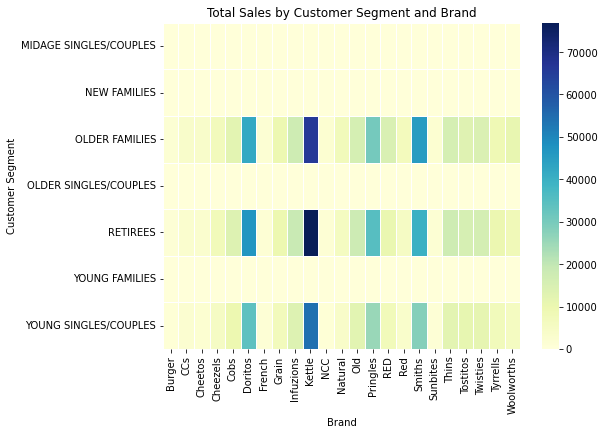

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(table, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Total Sales by Customer Segment and Brand")
plt.xlabel("Brand")
plt.ylabel("Customer Segment")
plt.show()













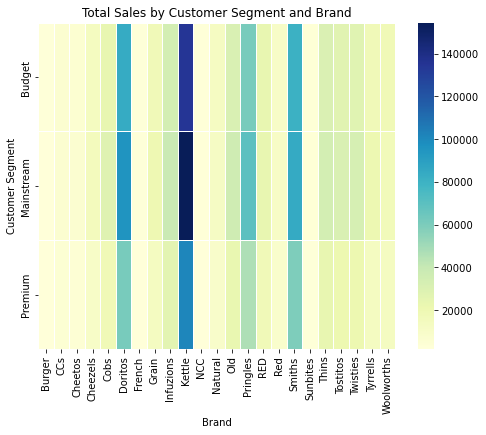

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(table2, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Total Sales by Customer Segment and Brand")
plt.xlabel("Brand")
plt.ylabel("Customer Segment")
plt.show()